In [1]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import matplotlib library for plotting graphs and charts
import matplotlib.pyplot as plt
# Import numpy library for numerical computations
import numpy as np
# Import matplotlib module for setting global parameters
import matplotlib as mpl
# Import datetime module for working with dates and times
from datetime import datetime
# Import matplotlib ticker module for customizing axes ticks
from matplotlib import ticker 

# Import the math module for mathematical functions
import math

# Import the datetime class from the datetime module
from datetime import datetime

# Use the inline backend to display plots in the notebook
%matplotlib inline

def draw_linear_fit(X,Y, All_X):
    # Fit a linear model to the first time interval and print the equation
    fit = np.polyfit(X, Y, 1)
    print("y=%.6fx+(%.6f)"%(fit[0],fit[1]))
    # Create a polynomial object from the coefficients
    fit_poly = np.poly1d(fit)
    # Plot the fitted line as a red line
    ax.plot(All_X, fit_poly(All_X), "r-")
    # Return the coefficients of the fitted line
    return fit

# Function to round a number up to the nearest multiple of another number
def ceiling_to_multiple(n, m):
    return math.ceil(n / m) * m

# Function to round a number down to the nearest multiple of another number
def floor_to_multiple(n, m):
    return math.floor(n / m) * m

In [7]:
# Read the csv file and assign column names
file = pd.read_csv("Data/2022/DC_ES_BA1.csv", names=["data","time","temp","units"], skiprows=50, skipfooter=50, engine='python')

# Extract the time column as a series
timestring = file["time"]

# Initialize an empty list to store the converted time values
time = []
# Loop through each element in the time series
for a in timestring:
    # Parse the string as a datetime object with the format '%H:%M:%S.%f'
    pt = datetime.strptime(a,'%H:%M:%S.%f')
    # Append the total number of seconds since midnight to the list
    time.append(pt.microsecond/1000000 + pt.second + pt.minute*60 + pt.hour*3600)
   
# Subtract the minimum value from the list to get the relative time
# This is done to normalize the time data to start from 0
time = time - np.min(time)

# Add a new column to the file dataframe with the relative time values
# This new column 'time_new' will be used for further analysis
file = file.assign(time_new=time)


<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
C:\Users\spellizzeri\AppData\Local\Temp\ipykernel_17472\2481076838.py:64: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('Temperature ($\degree C$)', size=20)  # y-axis label


y=0.000058x+(21.455198)
y=0.000078x+(24.008914)
R = 2.553717, 0.63R = 1.608841
T_0.63 = 23.064039 K
Delta T_0.63R = 2.563210 K


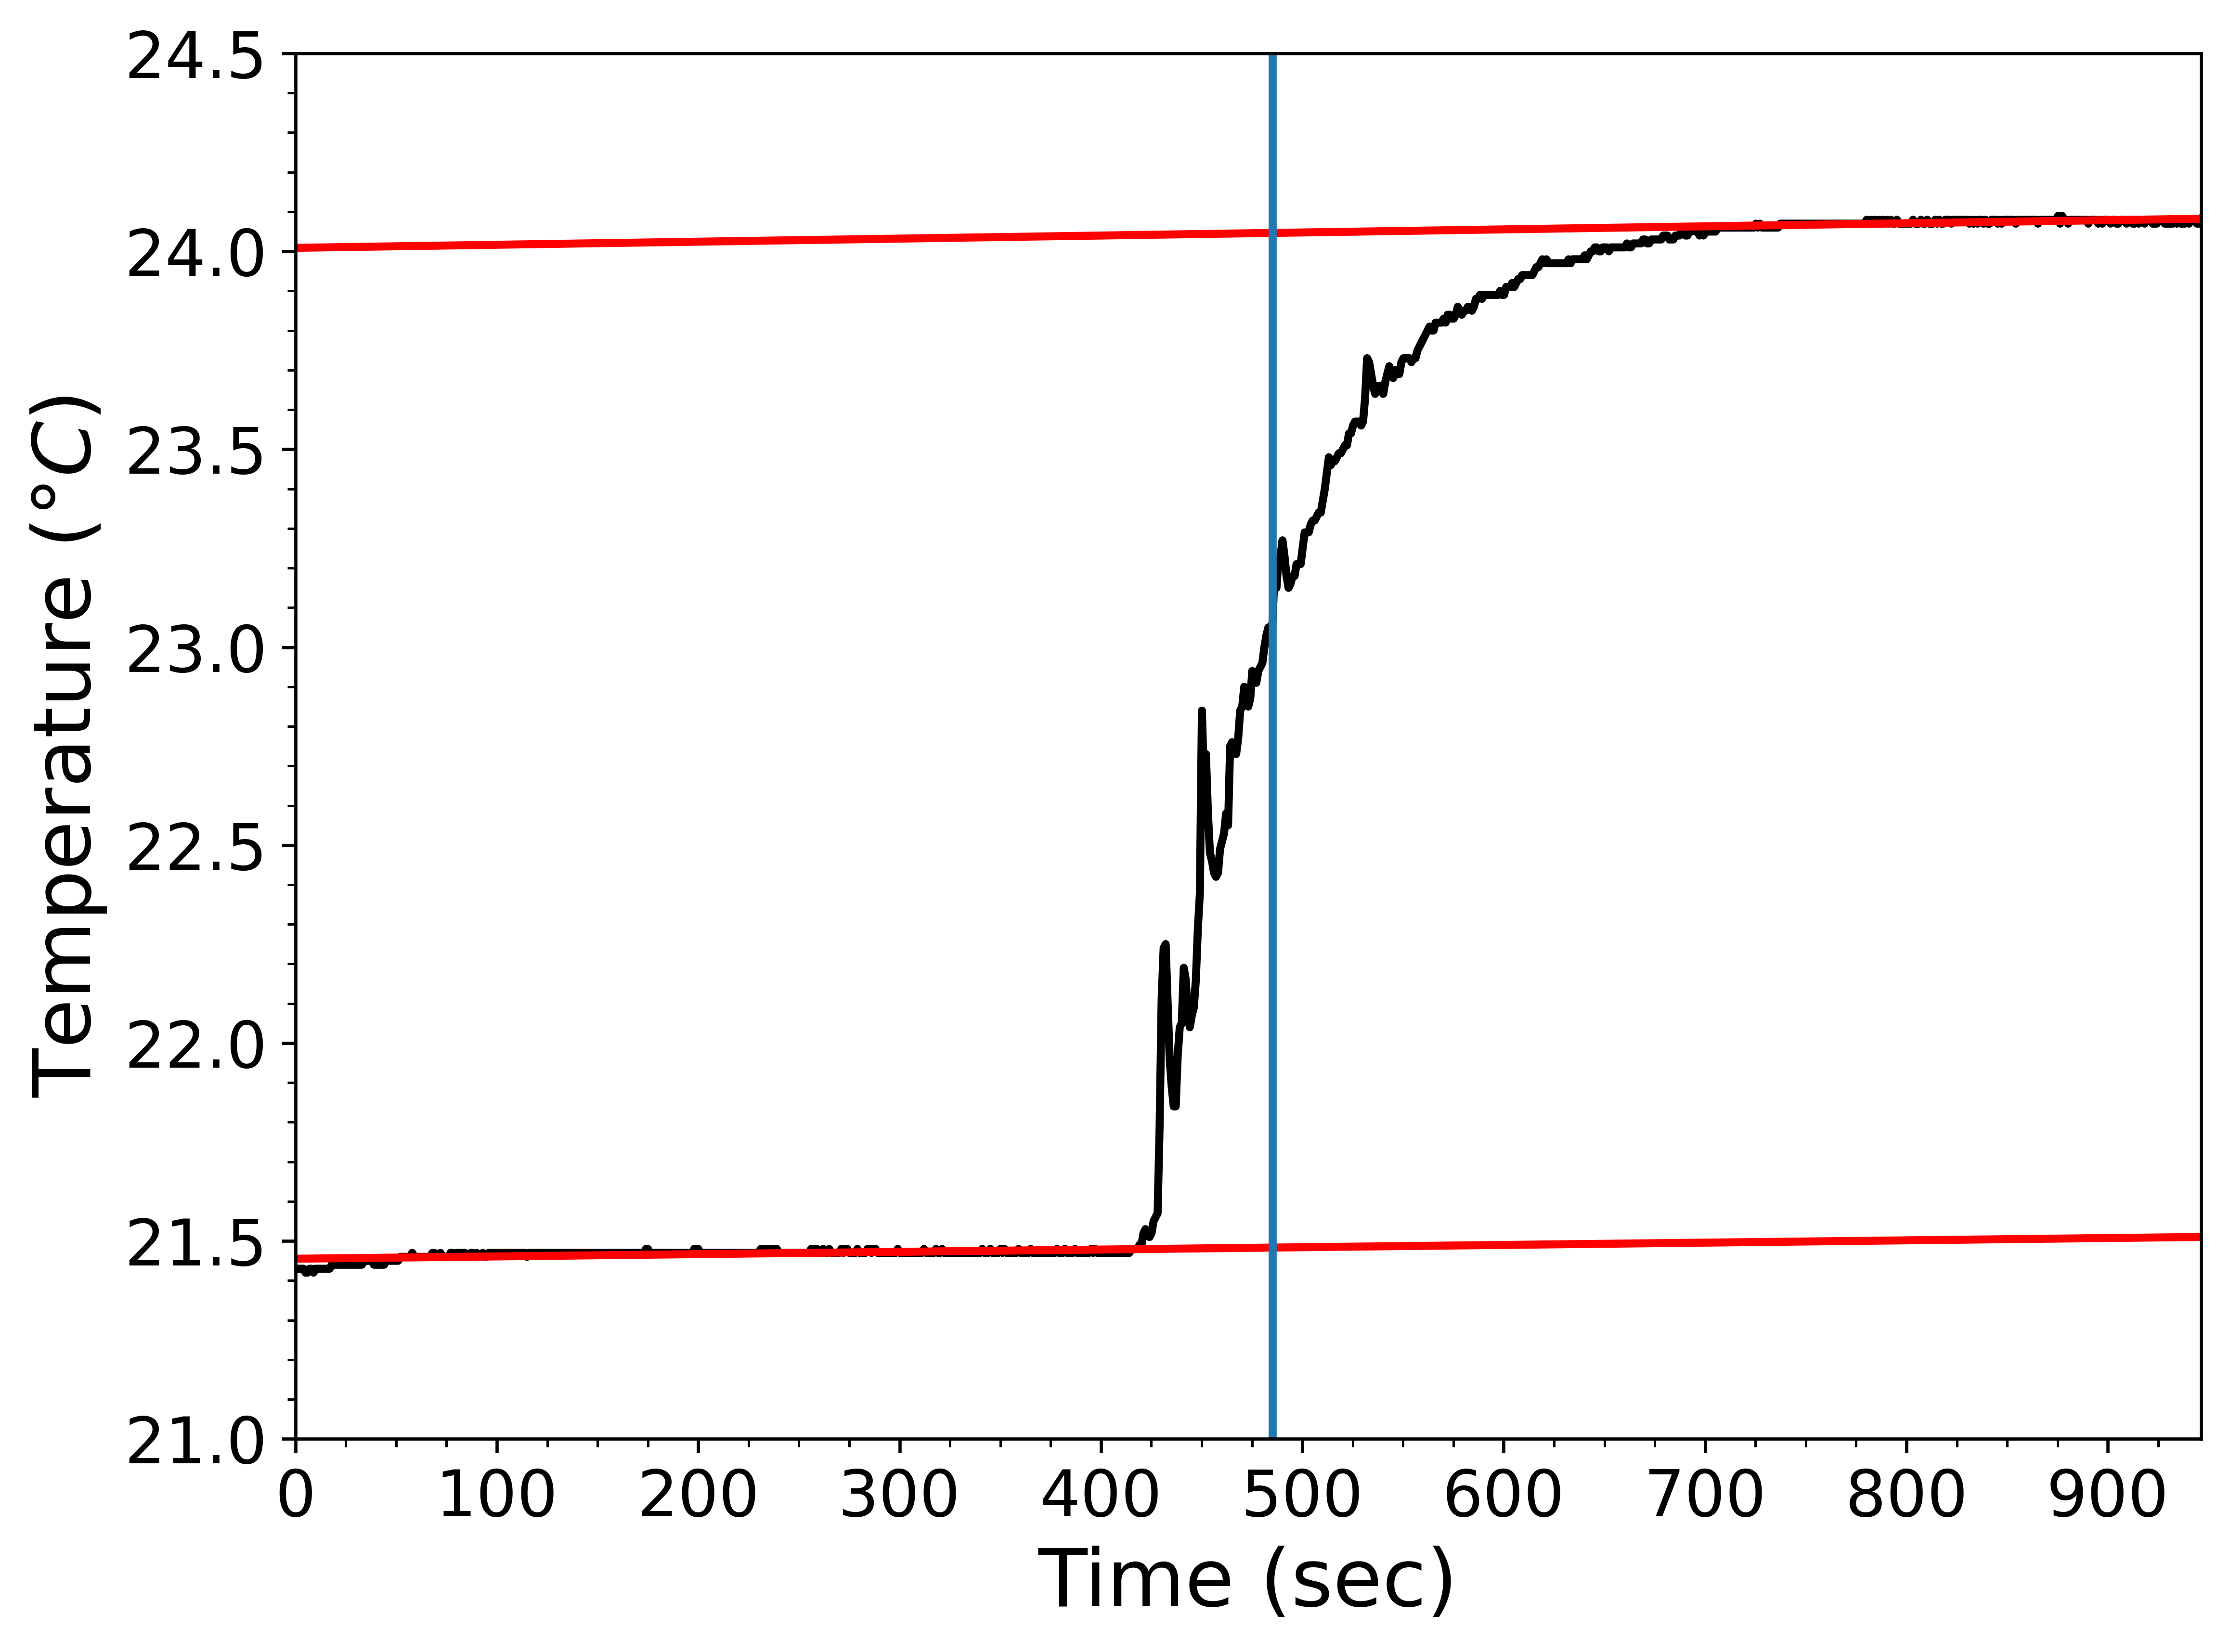

In [11]:
## Should only need to adjust values in this top section

# Set the time intervals for fitting the data
set_time_1 = 400 # determine from time 0 to the set time for the lower temperature limit
set_time_2 = 700 # determine from time set time to the final time for the upper temperature limit

filename = "Bomb.png" # Set to what you would like the saved plot to be called
###########################################################################################################################

# Creates the blank plot
fig, ax = plt.subplots(figsize=(8,6), dpi = 600)

# Plot the temperature against time
ax.plot(time,file["temp"], 'k')

# Fit a linear model to the first time interval and plot the fitted line
fit_T1 = draw_linear_fit(file["time_new"][10:set_time_1], file["temp"][10:set_time_1], file["time_new"])
# Fit a linear model to the second time interval and plot the fitted line
fit_T2 = draw_linear_fit(file["time_new"][set_time_2:-10], file["temp"][set_time_2:-10], file["time_new"])

# Calculate the difference between the y-intercepts of the two fitted lines
R = fit_T2[1] - fit_T1[1]
# Calculate the temperature corresponding to 63% of R
T_063R = fit_T1[1] + (0.63*R)
# Find the time at which the temperature reaches T_063R
T_063R_Time = file.iloc[(file['temp']-T_063R).abs().argsort()[:1]]
cross_time = float(T_063R_Time["time_new"].iloc[0])

# Draw a vertical line at the time at which the temperature reaches T_063R
ax.axvline(x=cross_time)

# Print the values of R, 0.63R, and T_063R
print("R = {:.6f}, 0.63R = {:.6f}".format(R,(0.63*R)))
print("T_0.63 = {:.6f} K".format(T_063R))

# Calculate the temperatures at the time of T_063R for the two fitted lines
temp_lower = fit_T1[0] * cross_time + fit_T1[1]
temp_higher = fit_T2[0] * cross_time + fit_T2[1]

# Print the difference between the two temperatures
print("Delta T_0.63R = {:.6f} K".format(temp_higher-temp_lower))

# Set default parameters to be used for matplotlib
mpl.rcParams['font.size'] = 16  # Default font size
mpl.rcParams['axes.titlesize'] = 20  # Default title size
mpl.rcParams['lines.linewidth'] = 2  # Default line width
mpl.rcParams['lines.markersize'] = 8  # Default marker size

# Set the limits of the x-axis and y-axis
ax.set_xlim([min(time), max(time)])
ax.set_ylim([floor_to_multiple(min(file["temp"]),0.5), ceiling_to_multiple(max(file["temp"]),0.5)])

# Set the major and minor ticks for the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(25))
# Set the major and minor ticks for the y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Time (sec)', size=20)  # x-axis label
ax.set_ylabel('Temperature ($\degree C$)', size=20)  # y-axis label

# Adjust the layout to fit the plot within the figure area
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig(filename, dpi=600)
# Display the plot
plt.show()
# Close the plot
plt.close()